# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_rmse(y_true, y_pred):
    """Вычисляет среднеквадратичное отклонение (СКО)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def calculate_r2(y_true, y_pred):
    """Вычисляет коэффициент детерминации R²"""
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Тестирование функций
y_true_test = np.array([1, 2, 3, 4, 5])
y_pred_test = np.array([1.1, 1.9, 3.2, 3.8, 5.1])

print(f"СКО тест: {calculate_rmse(y_true_test, y_pred_test):.4f}")
print(f"R² тест: {calculate_r2(y_true_test, y_pred_test):.4f}")

СКО тест: 0.1483
R² тест: 0.9890



# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

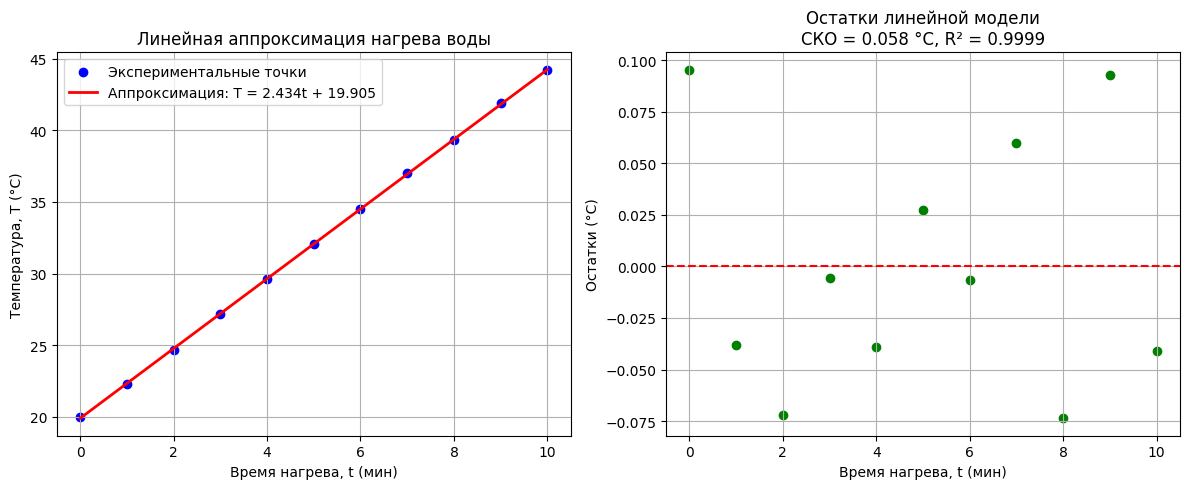

ЛИНЕЙНАЯ АППРОКСИМАЦИЯ (МНК)
Линейная модель: T = 2.4336 * t + 19.9045
СКО: 0.0583 °C
R²: 0.9999
Коэффициент корреляции: 1.0000


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

# Линейная регрессия
slope, intercept, r_value, p_value, std_err = stats.linregress(t, T)
a, b = slope, intercept
T_pred = a * t + b

# Вычисление СКО и R²
rmse_linear = calculate_rmse(T, T_pred)
r2_linear = calculate_r2(T, T_pred)

# Построение графика
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(t, T, color='blue', label='Экспериментальные точки')
plt.plot(t, T_pred, color='red', linewidth=2, label=f'Аппроксимация: T = {a:.3f}t + {b:.3f}')
plt.xlabel('Время нагрева, t (мин)')
plt.ylabel('Температура, T (°C)')
plt.title('Линейная аппроксимация нагрева воды')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
residuals = T - T_pred
plt.scatter(t, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Время нагрева, t (мин)')
plt.ylabel('Остатки (°C)')
plt.title(f'Остатки линейной модели\nСКО = {rmse_linear:.3f} °C, R² = {r2_linear:.4f}')
plt.grid(True)

plt.tight_layout()
plt.show()

print("="*50)
print("ЛИНЕЙНАЯ АППРОКСИМАЦИЯ (МНК)")
print("="*50)
print(f"Линейная модель: T = {a:.4f} * t + {b:.4f}")
print(f"СКО: {rmse_linear:.4f} °C")
print(f"R²: {r2_linear:.4f}")
print(f"Коэффициент корреляции: {r_value:.4f}")


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

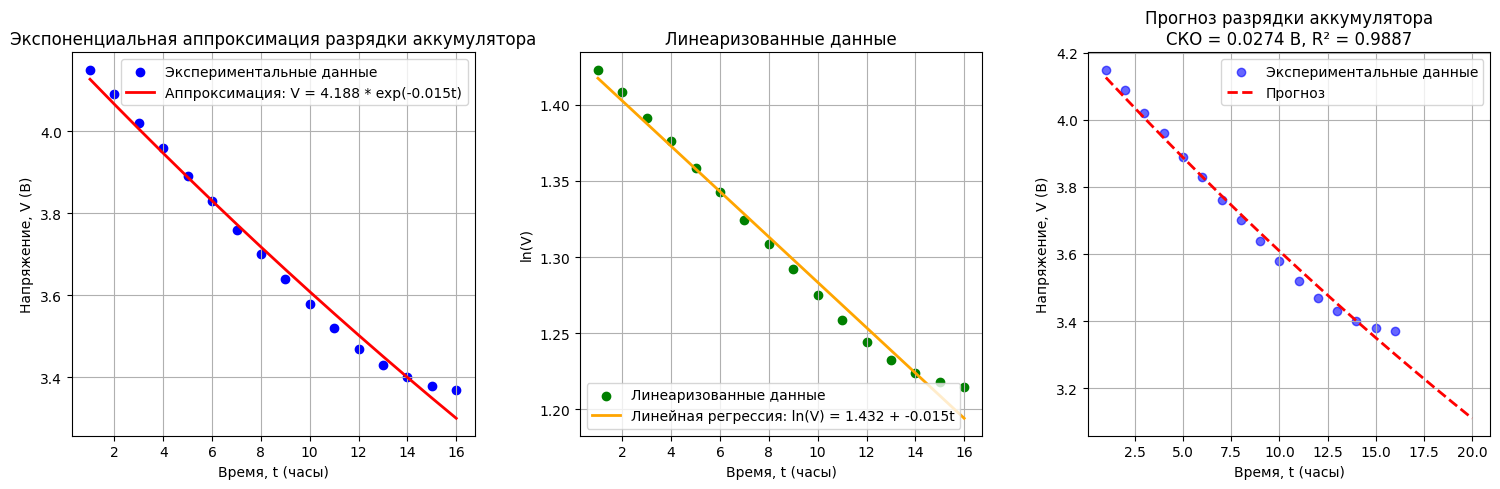


ЛИНЕАРИЗАЦИЯ ЭКСПОНЕНЦИАЛЬНОЙ ФУНКЦИИ
Экспоненциальная модель: V = 4.1883 * exp(-0.0149 * t)
СКО: 0.027380 В
R²: 0.9887
Коэффициент корреляции для линеаризованных данных: -0.9936
Напряжение через 20 часов: 3.110 В


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])

# Линеаризация: V(t) = a * exp(b*t)
# ln(V) = ln(a) + b*t
ln_voltage = np.log(voltage)

# Линейная регрессия для линеаризованных данных
slope_exp, intercept_exp, r_value_exp, p_value_exp, std_err_exp = stats.linregress(hours, ln_voltage)
b_exp = slope_exp
a_exp = np.exp(intercept_exp)

# Предсказание
voltage_pred = a_exp * np.exp(b_exp * hours)

# Вычисление СКО и R²
rmse_exp = calculate_rmse(voltage, voltage_pred)
r2_exp = calculate_r2(voltage, voltage_pred)

# Прогноз на будущее
future_hours = np.arange(1, 21, 1)
future_voltage = a_exp * np.exp(b_exp * future_hours)

# Построение графиков
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(hours, voltage, color='blue', label='Экспериментальные данные')
plt.plot(hours, voltage_pred, color='red', linewidth=2, label=f'Аппроксимация: V = {a_exp:.3f} * exp({b_exp:.3f}t)')
plt.xlabel('Время, t (часы)')
plt.ylabel('Напряжение, V (В)')
plt.title('Экспоненциальная аппроксимация разрядки аккумулятора')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(hours, ln_voltage, color='green', label='Линеаризованные данные')
plt.plot(hours, intercept_exp + b_exp * hours, color='orange', linewidth=2, label=f'Линейная регрессия: ln(V) = {intercept_exp:.3f} + {b_exp:.3f}t')
plt.xlabel('Время, t (часы)')
plt.ylabel('ln(V)')
plt.title('Линеаризованные данные')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(hours, voltage, color='blue', label='Экспериментальные данные', alpha=0.6)
plt.plot(future_hours, future_voltage, color='red', linestyle='--', linewidth=2, label='Прогноз')
plt.xlabel('Время, t (часы)')
plt.ylabel('Напряжение, V (В)')
plt.title(f'Прогноз разрядки аккумулятора\nСКО = {rmse_exp:.4f} В, R² = {r2_exp:.4f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ЛИНЕАРИЗАЦИЯ ЭКСПОНЕНЦИАЛЬНОЙ ФУНКЦИИ")
print("="*50)
print(f"Экспоненциальная модель: V = {a_exp:.4f} * exp({b_exp:.4f} * t)")
print(f"СКО: {rmse_exp:.6f} В")
print(f"R²: {r2_exp:.4f}")
print(f"Коэффициент корреляции для линеаризованных данных: {r_value_exp:.4f}")
print(f"Напряжение через 20 часов: {future_voltage[-1]:.3f} В")

## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите **степенную зависимость** вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.

2. Выполните **логарифмическую линеаризацию**: преобразуйте исходные координаты, взяв логарифмы обеих частей:
   $\ln(BMR) = \ln(c) + \alpha \ln(M)$

3. Постройте **линейную регрессию** для преобразованных координат $(\ln M, \ln BMR)$:
   - Найдите параметры линии регрессии
   - Вычислите $R^2$ для линеаризованной модели
   - Оцените погрешность определения параметров

4. Восстановите исходные параметры степенной функции:
   - Найдите $c = e^b$, где $b$ — свободный член линейной регрессии
   - Получите показатель степени $\alpha$

5. Создайте **комплексную визуализацию**:
   - График в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии
   - График в исходных координатах с степенной кривой
   - График остатков в обоих представлениях

6. Вычислите **коэффициент детерминации** $R^2$ для исходной степенной модели и сравните с линеаризованной.

7. Проанализируйте результаты:
   - Согласуется ли найденное значение $\alpha$ с известным результатом Клейбера (теоретически $\alpha \approx 0.75$)?
   - Что означает показатель степени $\alpha$ с физиологической точки зрения?
   - Как соотносятся поверхность и объём тела животного с показателем 0.75?

8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг
   - Енота массой 8 кг
   - Синего кита массой 150 000 кг

---

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


Вариант 1 (11)

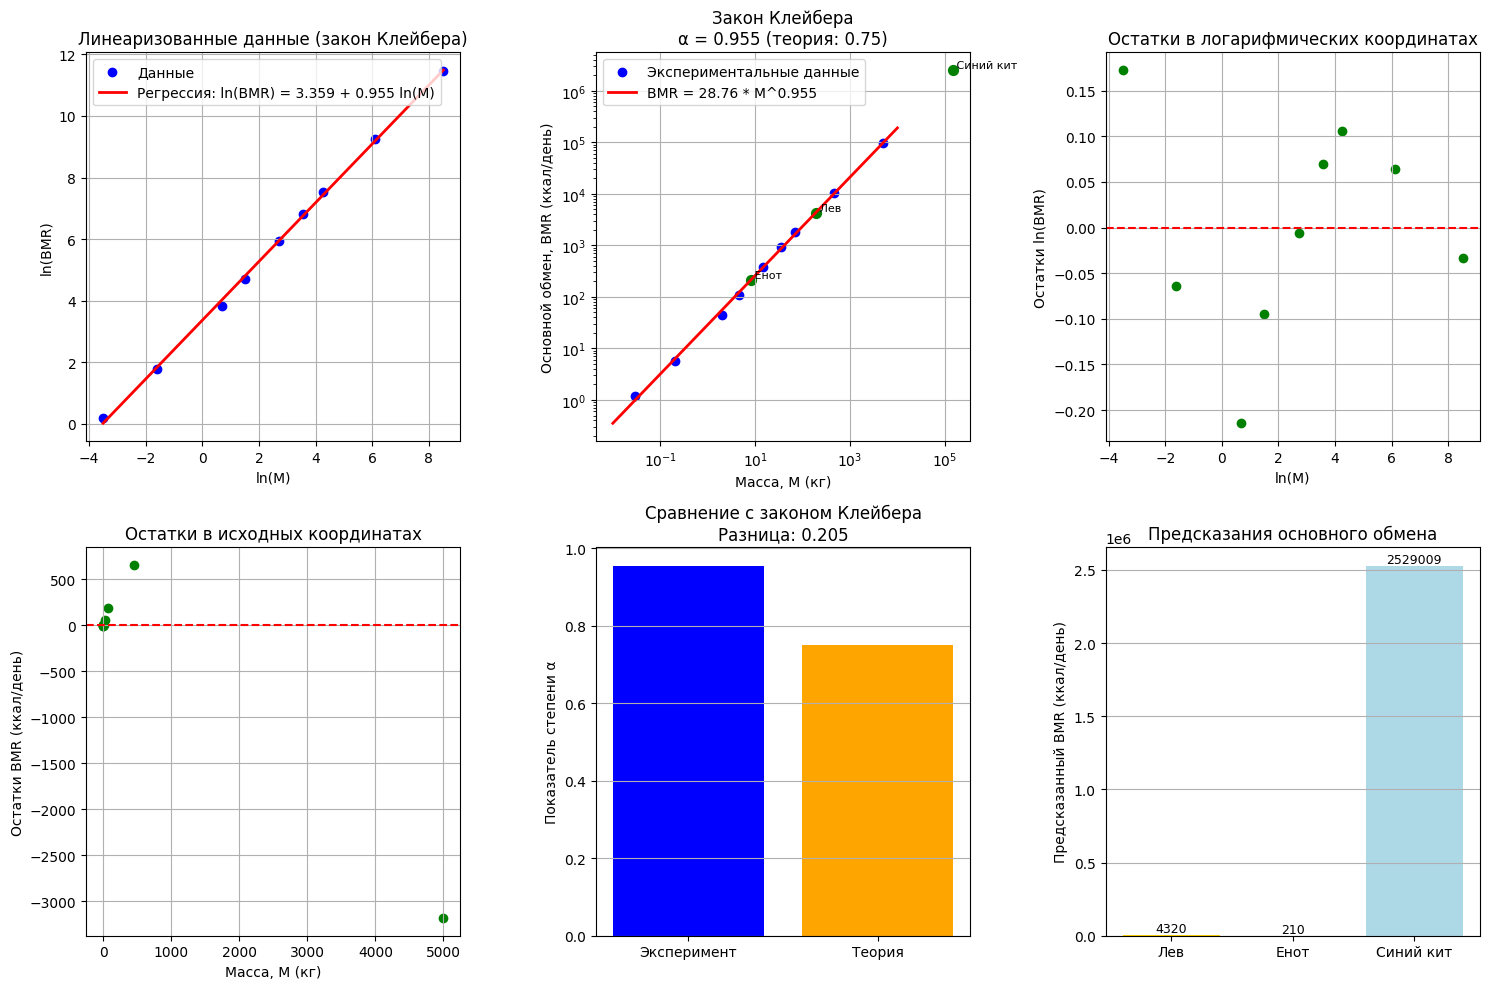


ЗАДАНИЕ 3: ВАРИАНТ 1 - ЗАКОН КЛЕЙБЕРА
Степенная модель Клейбера: BMR = 28.76 * M^0.9552
Коэффициент детерминации R²: 0.9986
Коэффициент корреляции: 0.9995

Сравнение с теорией:
Экспериментальный α: 0.9552
Теоретический α: 0.75
Отклонение: 0.2052 (27.4%)

Предсказания:
Лев (масса 190 кг): 4320 ккал/день
Енот (масса 8 кг): 210 ккал/день
Синий кит (масса 150000 кг): 2529009 ккал/день


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Данные: закон Клейбера
M = np.array([0.03, 0.2, 2.0, 4.5, 15, 35, 70, 450, 5000])  # масса, кг
BMR = np.array([1.2, 5.8, 45.0, 110.0, 380.0, 920.0, 1850.0, 10500.0, 95000.0])  # ккал/день

# Линеаризация: BMR = c * M^α → ln(BMR) = ln(c) + α * ln(M)
ln_M = np.log(M)
ln_BMR = np.log(BMR)

# Линейная регрессия
slope_pow1, intercept_pow1, r_value_pow1, p_value_pow1, std_err_pow1 = stats.linregress(ln_M, ln_BMR)
alpha1 = slope_pow1
c1 = np.exp(intercept_pow1)

# Предсказание
BMR_pred = c1 * (M ** alpha1)

# Коэффициент детерминации
r2_pow1 = calculate_r2(BMR, BMR_pred)

# Остатки
residuals_log = ln_BMR - (intercept_pow1 + alpha1 * ln_M)
residuals_orig = BMR - BMR_pred

# Предсказание для новых животных
animals = {
    'Лев': 190,
    'Енот': 8,
    'Синий кит': 150000
}

predictions = {}
for animal, mass in animals.items():
    predictions[animal] = c1 * (mass ** alpha1)

# Построение комплексной визуализации
plt.figure(figsize=(15, 10))

# 1. Логарифмические координаты
plt.subplot(2, 3, 1)
plt.scatter(ln_M, ln_BMR, color='blue', label='Данные')
plt.plot(ln_M, intercept_pow1 + alpha1 * ln_M, color='red', linewidth=2,
         label=f'Регрессия: ln(BMR) = {intercept_pow1:.3f} + {alpha1:.3f} ln(M)')
plt.xlabel('ln(M)')
plt.ylabel('ln(BMR)')
plt.title('Линеаризованные данные (закон Клейбера)')
plt.legend()
plt.grid(True)

# 2. Исходные координаты
plt.subplot(2, 3, 2)
plt.scatter(M, BMR, color='blue', label='Экспериментальные данные')
M_smooth = np.logspace(np.log10(0.01), np.log10(10000), 100)
BMR_smooth = c1 * (M_smooth ** alpha1)
plt.plot(M_smooth, BMR_smooth, color='red', linewidth=2,
         label=f'BMR = {c1:.2f} * M^{alpha1:.3f}')

# Отметки предсказаний
for animal, mass in animals.items():
    pred = predictions[animal]
    plt.scatter([mass], [pred], color='green', s=50)
    plt.text(mass, pred, f' {animal}', fontsize=8, verticalalignment='bottom')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Масса, M (кг)')
plt.ylabel('Основной обмен, BMR (ккал/день)')
plt.title(f'Закон Клейбера\nα = {alpha1:.3f} (теория: 0.75)')
plt.legend()
plt.grid(True)

# 3. Остатки в логарифмических координатах
plt.subplot(2, 3, 3)
plt.scatter(ln_M, residuals_log, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('ln(M)')
plt.ylabel('Остатки ln(BMR)')
plt.title('Остатки в логарифмических координатах')
plt.grid(True)

# 4. Остатки в исходных координатах
plt.subplot(2, 3, 4)
plt.scatter(M, residuals_orig, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Масса, M (кг)')
plt.ylabel('Остатки BMR (ккал/день)')
plt.title('Остатки в исходных координатах')
plt.grid(True)

# 5. Сравнение с теоретическим значением
plt.subplot(2, 3, 5)
plt.bar(['Эксперимент', 'Теория'], [alpha1, 0.75], color=['blue', 'orange'])
plt.ylabel('Показатель степени α')
plt.title(f'Сравнение с законом Клейбера\nРазница: {abs(alpha1-0.75):.3f}')
plt.grid(True, axis='y')

# 6. Предсказания
plt.subplot(2, 3, 6)
animals_names = list(predictions.keys())
pred_values = list(predictions.values())
colors = ['gold', 'lightgreen', 'lightblue']
bars = plt.bar(animals_names, pred_values, color=colors)
plt.ylabel('Предсказанный BMR (ккал/день)')
plt.title('Предсказания основного обмена')
for bar, val in zip(bars, pred_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{val:.0f}', ha='center', va='bottom', fontsize=9)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ЗАДАНИЕ 3: ВАРИАНТ 1 - ЗАКОН КЛЕЙБЕРА")
print("="*50)
print(f"Степенная модель Клейбера: BMR = {c1:.2f} * M^{alpha1:.4f}")
print(f"Коэффициент детерминации R²: {r2_pow1:.4f}")
print(f"Коэффициент корреляции: {r_value_pow1:.4f}")
print(f"\nСравнение с теорией:")
print(f"Экспериментальный α: {alpha1:.4f}")
print(f"Теоретический α: 0.75")
print(f"Отклонение: {abs(alpha1-0.75):.4f} ({(abs(alpha1-0.75)/0.75*100):.1f}%)")
print(f"\nПредсказания:")
for animal, mass in animals.items():
    print(f"{animal} (масса {mass} кг): {predictions[animal]:.0f} ккал/день")